# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


[37852 18457 56956 ... 64912 47119 42256]


<Figure size 640x480 with 0 Axes>

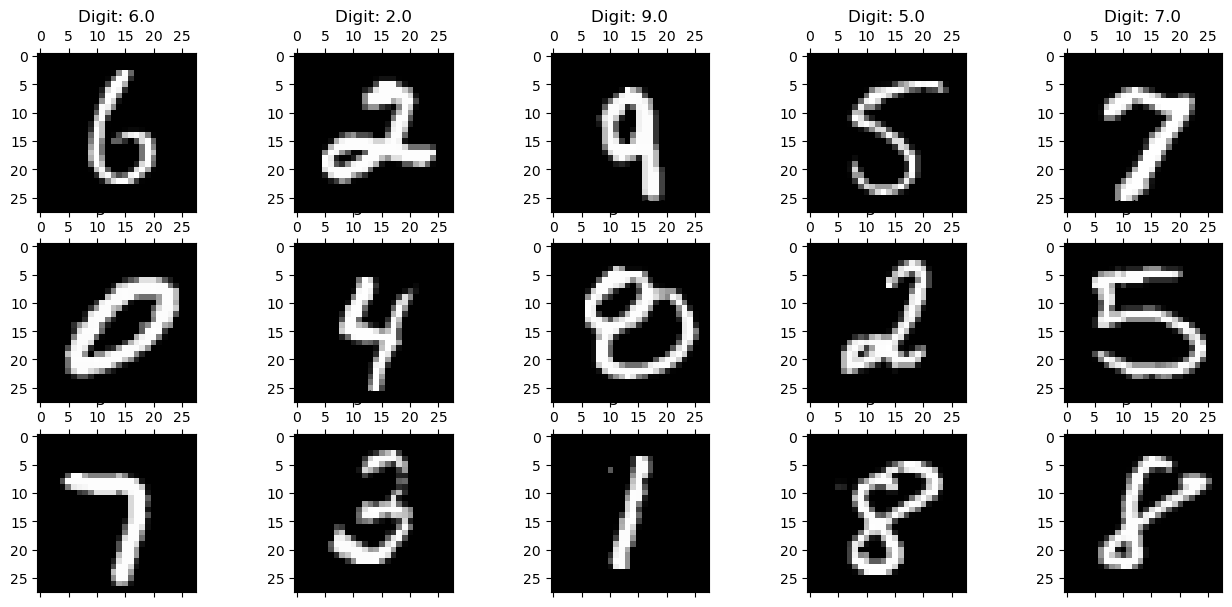

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])
# print(rndperm)

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [10]:
target = df['y'].copy()
x = df.copy()
del x['y']


In [11]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(x,target,test_size = 0.2, shuffle = True)


### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [14]:
x_cov = x.T.dot(x)
trace_x = np.trace(x_cov)
trace_x

50330000.00000001

149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394 395 396 397 398 

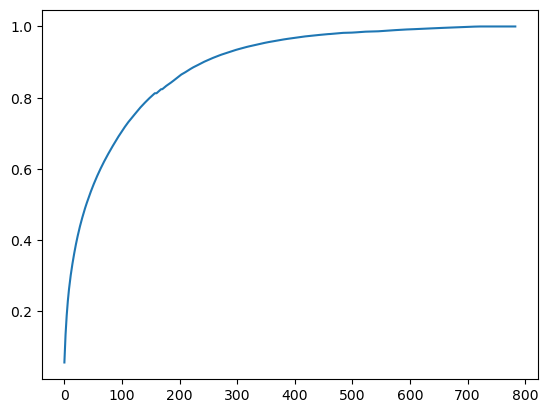

In [21]:
eigen = lin.eig(x_cov)
eigenvalues = eigen[0]
result = list()
temp = 0
for i in range(len(x.T)):
    temp = temp+eigenvalues[i]
    result.append(temp/trace_x)
    if temp/trace_x >0.8:
        print(i,end = ' ')

fig,ax = plt.subplots(1,1)
ax = plt.plot(result)
# ax.ylabel("explaning measure")
plt.show()
# 149까지 즉, 150개 pc가 80%의 설명력


In [28]:
from sklearn.decomposition import PCA
model = PCA(n_components = 150)
mypca = model.fit_transform(x)

mypca = pd.DataFrame(mypca, columns = ['PC'+str(i) for i in range(150)])
mypca

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC140,PC141,PC142,PC143,PC144,PC145,PC146,PC147,PC148,PC149
0,8.813530,-7.517562,-3.714184,-1.766171,0.891472,-5.107948,-0.134804,3.197198,-0.238252,-1.003451,...,-0.073576,-0.309134,-0.428208,-0.160295,-0.313047,0.025923,0.055162,-0.014557,-0.426156,-0.022991
1,10.500230,-8.016274,-4.164520,-2.871424,2.976391,-4.357165,1.941735,2.492574,0.643046,-1.917571,...,1.304642,-0.395091,-0.708084,-0.799893,-0.941371,-0.495273,0.345388,-0.125498,-0.152558,-0.271210
2,1.910373,-6.307742,-1.716793,-3.169758,-6.088714,0.993035,-0.356545,5.488212,3.877449,-2.872258,...,0.314203,0.127404,0.209635,-0.004290,-0.120731,0.168411,-0.582920,-0.256867,-0.781924,0.042232
3,6.067444,-7.543057,-2.128116,-0.142326,-4.755557,-0.495292,0.534491,6.676864,3.107495,-2.460839,...,-0.109253,-0.188995,0.192251,0.091332,-0.011637,0.292937,-0.134135,-0.450156,-0.024330,-0.608671
4,16.523116,-3.769320,-6.858544,-10.360417,2.021106,-2.265696,-0.891593,-1.741750,-1.718556,0.150161,...,0.692001,-0.641161,0.239352,-0.737935,-0.143007,0.677280,-0.227450,1.204013,-0.129297,0.077633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2.139472,-3.809555,-10.788359,2.349989,6.032540,4.252828,-1.677303,-1.106922,3.980799,6.172704,...,2.183898,-1.581939,-0.645964,1.551361,1.114825,-0.922601,0.231310,-1.653032,2.444985,-0.523010
69996,-0.045644,3.349944,-7.247791,3.137196,-4.615527,0.043902,-1.222742,-0.940119,-2.796452,-1.237741,...,-1.056940,0.031880,0.428443,0.202019,-0.212674,-0.302718,0.005345,0.525117,0.978850,0.522939
69997,-2.284102,-0.629950,-8.251889,0.303631,-0.608402,1.816640,-2.772136,-2.013740,1.492666,0.912377,...,0.357502,-0.313890,0.100399,0.142798,-0.775997,0.065476,0.024718,0.478574,-1.166952,0.680198
69998,-1.010785,-2.129179,-9.914107,1.806563,0.040596,3.390347,-3.255808,-1.564554,1.449307,3.973528,...,0.716612,-0.614911,-0.609541,0.178960,-1.169953,-0.937823,-0.388292,0.231570,0.659659,0.143513


In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

In [30]:
mypca['y'] = mnist['label'].T
del mypca['y']

In [36]:
mypca_train,mypca_test,y_train,y_test = train_test_split(mypca,y,shuffle=True,test_size = 0.2)


In [37]:
scaler = StandardScaler()
mypca_train = scaler.fit_transform(mypca_train)

In [38]:
y_train.shape

(56000, 1)

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(mypca_train, y_train)

/Users/inhyucksong/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/inhyucksong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
print(model.score(mypca_train, y_train))

0.926875


In [41]:
mypca_test = scaler.transform(mypca_test)

In [42]:
model.score(mypca_test, y_test)
# final prediction score

0.9223571428571429

특정한 틀 없이 자유롭게 해주시면 됩니다!